In [15]:
import pandas as pd
import numpy as np

# Read the data and extract relevant columns
file_path_grouped = 'raw_data_table1_grouped.md'
data_grouped = pd.read_csv(file_path_grouped, delim_whitespace=True)
print("===== Original Data =====")
print(data_grouped)

# Extract OBJECT, r, and v columns and apply group labels
object_r_v_columns_grouped = data_grouped[['OBJECT', 'r', 'v']].copy()
print("\n===== Extracted Columns (OBJECT, r, v) =====")
print(object_r_v_columns_grouped)

# Apply group labels
group_labels = {
    "'S.Mag.'": 'Group 1', "'L.Mag.'": 'Group 1',
    '598': 'Group 2', '221': 'Group 2', '224': 'Group 2',
    '1068': 'Group 3',
    '3627': 'Group 4', '3031': 'Group 4',
    '4258': 'Group 5', '4151': 'Group 5', '4382': 'Group 5', '4472': 'Group 5',
    '4486': 'Group 5', '4649': 'Group 5', '4449': 'Group 5', '4214': 'Group 5',
    '4826': 'Group 5', '4736': 'Group 5',
    '5236': 'Group 6', '5055': 'Group 6', '5457': 'Group 6', '5194': 'Group 6',
    "'N.G.C.6822'": 'Group 7',
    '7331': 'Group 8'
}
object_r_v_columns_grouped['Group'] = object_r_v_columns_grouped['OBJECT'].map(group_labels)
print("\n===== Data with Group Labels =====")
print(object_r_v_columns_grouped)

# Calculate mean r, v, and uncertainty of v for each group without filtering
group_means = object_r_v_columns_grouped.groupby('Group')[['r', 'v']].mean()
print("\n===== Group Means (r and v) =====")
print(group_means)

group_std = object_r_v_columns_grouped.groupby('Group')['v'].std()
print("\n===== Group Standard Deviation (v) =====")
print(group_std)

group_size = object_r_v_columns_grouped.groupby('Group')['v'].count()
print("\n===== Group Size (count of v) =====")
print(group_size)

group_uncertainty_v = group_std / np.sqrt(group_size)
print("\n===== Group Uncertainty in v =====")
print(group_uncertainty_v)

# Create the unfiltered data table
group_summary_unfiltered = pd.DataFrame({
    'x': group_means['r'],
    'y': group_means['v'],
    'sigma': group_uncertainty_v
}).reset_index()
print("\n===== Unfiltered Group Summary =====")
print(group_summary_unfiltered)

# Apply filtering to remove rows with NaN in 'sigma'
group_summary_filtered = group_summary_unfiltered.dropna(subset=['sigma'])
print("\n===== Filtered Group Summary =====")
print(group_summary_filtered)


===== Original Data =====
          OBJECT   m_s      r     v   m_t   M_t
0       'S.Mag.'    ..  0.032   170   1.5 -16.0
1       'L.Mag.'    ..  0.034   290   0.5  17.2
2            598    ..  0.263   -70   7.0  15.1
3            221    ..  0.275  -185   8.8  13.4
4            224    ..  0.275  -220   5.0  17.2
5           1068  18.7  1.000   920   9.1  15.9
6           3627  18.5  0.900   650   9.1  15.7
7           3031  18.5  0.900   -30   8.3  16.4
8           4258  19.5  1.400   500   8.7  17.0
9           4151  20.0  1.700   960  12.0  14.2
10          4382    ..  2.000   500  10.0  16.5
11          4472    ..  2.000   850   8.8  17.7
12          4486    ..  2.000   800   9.7  16.8
13          4649    ..  2.000  1090   9.5  17.0
14          4449  17.8  0.630   200   9.5  14.5
15          4214  18.3  0.800   300  11.3  13.2
16          4826  18.5  0.900   150   9.0  15.7
17          4736  17.3  0.500   290   8.4  15.1
18          5236  18.5  0.900   500  10.4  14.4
19          50

In [16]:
# Save the filtered data to CSV file
output_path_filtered = 'grouped_data_summary_filtered.csv'
group_summary_filtered.to_csv(output_path_filtered, index=False)
print(f"Filtered data saved at: {output_path_filtered}")

Filtered data saved at: grouped_data_summary_filtered.csv


{'intercept': -51.1557625285808, 'slope': 390.99259614026244, 'sigma_a': 43.98076670146868, 'sigma_b': 79.99508261745844, 'chi_squared': 45.27085807477911}


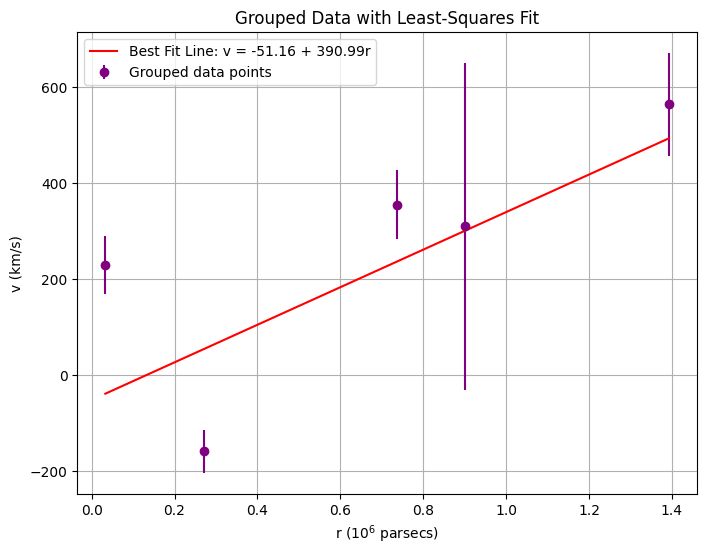

In [14]:
import matplotlib.pyplot as plt
from linear_fit import linear_fit, read_data_from_csv

# Use read_data_from_csv to load the filtered data
x, y, sigma = read_data_from_csv(output_path_filtered)

# Use linear_fit to perform fitting
fit_results = linear_fit(x, y, sigma)
print(fit_results)

# Generate plot with fit line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = fit_results['intercept'] + fit_results['slope'] * x_fit

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=sigma, fmt='o', color='purple', label='Grouped data points')
plt.plot(x_fit, y_fit, color='red', label=f'Best Fit Line: v = {fit_results["intercept"]:.2f} + {fit_results["slope"]:.2f}r')
plt.xlabel('r ($10^6$ parsecs)')
plt.ylabel('v (km/s)')
plt.title('Grouped Data with Least-Squares Fit')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()